# Project Details

1. Data Wrangling
    * Gathering Data 
    * Assessing Data
    * Cleaning Data
2. Storing, Analyzing, and Visualizing wrangled data
3. Reporting data wrangling efforts, data analyses, and visualizations

## Data Wrangling
### Gathering Data
1. Twitter Archive Enhanced
2. Image Predictions
3. Twitter API Data

In [299]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import json

In [300]:
# load given twitter archive
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [301]:
# count number of tweets from the archive (number of tweets with ratings only)
archive.shape[0]

2356

In [302]:
# sort and set df showing latest tweets first 
archive.sort_values('timestamp',ascending=False,inplace=True)
archive.head() #inspect the data 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [303]:
# download image predictions from Udacity's server
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [304]:
# import and load the tsv file by setting the separator to (tab) into a df called images 
images = pd.read_csv('image-predictions.tsv', sep='\t')

# check to see if it was imported correctly 
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [305]:
# count tweets from image-predictions.tsv (number of tweets with images)
images.shape[0]

2075

In [306]:
# set keys to establish connection (*removed for submission)
consumer_key = 'XXXXX'
consumer_secret = 'XXXXX'
access_token = 'XXXXX'
access_token_secret = 'XXXX'

In [307]:
# configure connection (http://docs.tweepy.org/en/v3.5.0/auth_tutorial.html)
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# create an API object 
api = tweepy.API(auth,
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

In [308]:
# set 2 lists and download Tweepy Status objects (items) via API

# list contains tweets w/ tweet ids
tweets_list = []

# list contains ids w/o tweets 
no_tweets_list = []

count = 0
for tweet_id in archive['tweet_id']:   
    count += 1
    try:
        tweets_list.append(api.get_status(tweet_id))
    except Exception as e:
        no_tweets_list.append(tweet_id)
        
    # keep track of items processed (should say 2350 @ the end)
    if count % 50 == 0:
        print(str(count)+ " items processed ")

50 items processed 
100 items processed 
150 items processed 
200 items processed 
250 items processed 
300 items processed 
350 items processed 
400 items processed 
450 items processed 
500 items processed 
550 items processed 
600 items processed 
650 items processed 
700 items processed 
750 items processed 
800 items processed 
850 items processed 
900 items processed 
Rate limit reached. Sleeping for: 732
950 items processed 
1000 items processed 
1050 items processed 
1100 items processed 
1150 items processed 
1200 items processed 
1250 items processed 
1300 items processed 
1350 items processed 
1400 items processed 
1450 items processed 
1500 items processed 
1550 items processed 
1600 items processed 
1650 items processed 
1700 items processed 
1750 items processed 
1800 items processed 
Rate limit reached. Sleeping for: 734
1850 items processed 
1900 items processed 
1950 items processed 
2000 items processed 
2050 items processed 
2100 items processed 
2150 items processed

In [309]:
# https://stackabuse.com/writing-files-using-python/

# create tweet_json.txt
with open('tweet_json.txt', 'w') as outfile:   # load JSON data we gathered 
        for tweet_json in tweets_list:
            json.dump(tweet_json, outfile)  # write data (what we constructed) to outfile 
            outfile.write('\n')   # save JSON data as tweets_json.txt file 

In [312]:
#https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object (for attributes)


# create a list of attributes 
attr_list = []

# open the text file and read as JSON file 
with open('tweet_json.txt', 'r') as json_file:
    
    # read the first line for the loop to start below
    line = json_file.readline()
    
    # create loop to get retweets and their links 
    while line:
        json_data = json.loads(line)
        retweeted_status = json_data['retweeted_status'] = json_data.get('retweeted_status', 'original')
        if retweeted_status == 'original':
            url = json_data['text'][json_data['text'].find('https'):]
        else:
            retweeted_status = 'retweet'
            url = 'retweet'
        
        # create a dictionary for the selected attributes 
        attributes = {'tweet_id': str(json_data['id']), 
                            'favorite_count': int(json_data['favorite_count']),
                            'retweet_count': int(json_data['retweet_count']),
                            'followers_count': int(json_data['user']['followers_count']),
                            'friends_count': int(json_data['user']['friends_count']),
                            'url': url,
                            'retweeted_status': str(retweeted_status)}
        
        # add above to our list
        attr_list.append(attributes)
        
        # read the next line of JSON data
        line = json_file.readline()

# convert the tweet JSON data dictionary list to a pandas DataFrame
    api_data = pd.DataFrame(attr_list, 
                               columns = ['tweet_id',
                                    'favorite_count',
                                    'retweet_count',
                                    'followers_count',
                                    'friends_count',
                                    'url',
                                    'retweeted_status'])

In [313]:
#inspect
api_data.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,url,retweeted_status
0,892420643555336193,36357,7738,8767944,15,https://t.co/MgUWQ76dJU,original
1,892177421306343426,31325,5728,8767944,15,https://t.co/aQFSeaCu9L,original
2,891815181378084864,23596,3789,8767944,15,https://t.co/r0YlrsGCgy,original
3,891689557279858688,39665,7901,8767944,15,https://t.co/tD36da7qLQ,original
4,891327558926688256,37866,8523,8767944,15,https://t.co/0g0KMIVXZ3,original


## Assessing Data
### Visual Assessment using Jupyter

*As I've gathered each of the above pieces of data, I will assess them visually and programmatically for quality and tidiness issues.*

In [314]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [317]:
api_data 

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,url,retweeted_status
0,892420643555336193,36357,7738,8767944,15,https://t.co/MgUWQ76dJU,original
1,892177421306343426,31325,5728,8767944,15,https://t.co/aQFSeaCu9L,original
2,891815181378084864,23596,3789,8767944,15,https://t.co/r0YlrsGCgy,original
3,891689557279858688,39665,7901,8767944,15,https://t.co/tD36da7qLQ,original
4,891327558926688256,37866,8523,8767944,15,https://t.co/0g0KMIVXZ3,original
5,891087950875897856,19070,2852,8767944,15,https://t.co/xx5cilW0Dd,original
6,890971913173991426,11108,1858,8767944,15,https://t.co/MV01Q820LT,original
7,890729181411237888,61264,17266,8767944,15,https://t.co/hrcFOGi12V,original
8,890609185150312448,26248,3933,8767944,15,https://t.co/UkrdQyoYxV,original
9,890240255349198849,29985,6728,8767944,15,https://t.co/l3TSS3o2M0,original


In [318]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Programmatic Assessment

In [394]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [395]:
sum(archive['tweet_id'].duplicated())

0

In [396]:
# check timestamp column type
type(archive.timestamp[0])

str

**Issues**
* timestamp column is in string format 
 - needs to be in datetime format
* tweet_id column contains floats 
 - needs to be strings b/c these are identification numbers  *not for calcuations
* 181 of the tweets are retweets
 - need to remove these 181 rows because they are essentailly duplicates of original 
* 78 of the tweets are replies to other tweets
 - need to remove these 78 rows b/c it doesn't help with our project motivation 
* 4 columns for dog stages 
 - this can be better organized by just having 1 column and have 4 different values 


In [322]:
# check the ratings
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

*Above shows unique values where 1776 being the highest and weird value like **666**, the devil's number.* 

In [323]:
#inspect highest rating 
archive.query("rating_numerator == 1776")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [324]:
# second highest rating
archive.query("rating_numerator == 960")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


*Above is retweet, showing that ratings vary greatly and not consistent throughout.*
*Hints that we can use 10 as a common denominator.*

In [325]:
# check for tweets that were extracted incorrectly 

# check to see if tweets contain decimals, leading to high values or value like "666" vs 6.66 (in text)
archive[archive['text'].str.contains(r'(\d+\.\d+\/\d+)')] 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


**Issues**
* Extraction isssue 
 - Dataframe needs to be cleaned where ratings mirror original tweets
* Numerator isssue  
 - Needs to be in floats (* i.e., 11.26 was extracted incorrectly and gets a score of 26)
 - However, cannot change values given (* i.e., 1776 is an actual rating and not a typo) 

In [326]:
# check the rating_denominator column
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [327]:
# query select the tweet where denominator is 0 and view it's tweet ('text')
archive.query("rating_denominator == 0")['text']

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object

In [328]:
archive.query("rating_denominator == 7")['text']

516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object

In [329]:
archive.query("rating_denominator == 170")['text']

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object

**Issues**
* Denominator issues
 - Set common denominator as 10
 - Needs to be in floats too to since our numerators need to be changed to floats
 - Project Moviation states that **"[t]he fact that the rating numerators are greater than the denominators does not need to be cleaned".**

In [330]:
# check the name column
archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Tucker       10
Lola         10
Penny        10
Bo            9
Winston       9
the           8
Sadie         8
Daisy         7
Bailey        7
Toby          7
an            7
Buddy         7
Leo           6
Stanley       6
Bella         6
Jack          6
Milo          6
Koda          6
Jax           6
Scout         6
Dave          6
Rusty         6
Oscar         6
Alfie         5
           ... 
Tilly         1
Iggy          1
Maks          1
Vince         1
Monster       1
Damon         1
Chaz          1
Acro          1
Beya          1
Sunshine      1
Erik          1
Marq          1
Aqua          1
BeBe          1
Timmy         1
Teddy         1
Charl         1
Jimbo         1
Schnozz       1
Goliath       1
Carter        1
Claude        1
Mack          1
Andy          1
Grizz         1
Anthony       1
Kuyu          1
Skye          1
Perry         1
Jerome        1
Name: name, Length: 957,

*Above shows lots of questionable "names" like "a" and "the" which are non-names, signaling extraction error.*

In [397]:
# check names that aren't capitalized b/c names should be capitalized 

# use regex where names start with lower-case letters 
non_capital_names = archive.name.str.contains(pat='^[a-z]', regex = True) 
archive[non_capital_names].name.value_counts()

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
not              2
getting          2
actually         2
mad              2
his              1
unacceptable     1
by               1
space            1
light            1
all              1
my               1
old              1
such             1
life             1
incredibly       1
this             1
officially       1
infuriating      1
Name: name, dtype: int64

**Issues**
* Name isssues
 - Another extraction error
 - Need to get rid of non-capital names, which aren't names afterall

In [398]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Issues**
 - tweet_id column should in strings 

In [399]:
# evaluate a sample of the image predictions
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1899,851224888060895234,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,car_mirror,0.971512,False,seat_belt,0.007063,False,standard_poodle,0.005683,True
1199,740711788199743490,https://pbs.twimg.com/media/CkeJcNkXEAAcrks.jpg,1,toy_poodle,0.388277,True,Angora,0.180264,False,Persian_cat,0.049656,False
381,673317986296586240,https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg,2,miniature_pinscher,0.384099,True,bloodhound,0.079923,True,Rottweiler,0.068594,True
15,666099513787052032,https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg,1,Lhasa,0.582330,True,Shih-Tzu,0.166192,True,Dandie_Dinmont,0.089688,True
131,668297328638447616,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,1,king_penguin,0.606747,False,ice_bear,0.264221,False,Eskimo_dog,0.032784,True


In [400]:
# check for duplicates of url 
images.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

**Issues**
 - 66 duplicated jpg_urls 

In [401]:
# inspect what we generated from Twitter API 
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 7 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
url                 2331 non-null object
retweeted_status    2331 non-null object
dtypes: int64(4), object(3)
memory usage: 127.6+ KB


In [402]:
# inspect a sample
api_data.sample(5)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,url,retweeted_status
2177,668643542311546881,847,508,8767948,15,https://t.co/IiSdmhkC5N,original
738,778624900596654080,4724,1029,8767947,15,https://t.co/0rRxyBQt32,original
1133,724405726123311104,5260,1641,8767945,15,https://t.co/nRUaKWnJfH,original
1784,676864501615042560,2079,699,8767947,15,https://t.co/NJj2uP0atK,original
1369,700029284593901568,2078,583,8767945,15,https://t.co/8Nuny4lLE3,original


In [403]:
# count for retweets and original tweets 
api_data.retweeted_status.value_counts()

original    2168
retweet      163
Name: retweeted_status, dtype: int64

## Assessment Overview 
    
### Twitter Archive
  
#### Quality


* Quality Issue (1) : data contains 181 retweets
 - Get rid of rows that are retweets 
* Quality Issue (2) : data contains 78  replies
 - Get rid of rows that are replies 
* Quality Issue (3) : timestamp column is in string format
 - Change to datetime format 
* Quality Issue (4) : tweet_id column contains integers
 - Change to string format 
* Quality Issue (5) : rating_numerator column values need to be in floats
 - Change to floats programmatically 
* Quality Issue (6) : rating_denominators column needs one consistent value all across (10)
 - Use lambda function to change all denominators to 10
* Quality Issue (7) : rating_denominator values need to be in floats 
 - Change to floats programmatically 
* Quality Issue (8) : name column contains non-name values
 - Replace them with string 'None'
 
#### Tidiness
* Tidiness Issue (1) : Data contains 4 columns for dog stages, need just one column and have them as values

  
### Image Prediction
  
#### Quality
* Quality Issue (9) : Data contains 66 duplicated jpg_urls
* Quality Issue (10) : tweet_id column needs to be in string format 

#### Tidiness
* Tidiness Issue (2) : Needs one column each for image prediction and confidence level

  
### Twitter API Data
  
#### Quality
* Quality Issue (11) : Data contains retweets, get rid of them to keep only the originals 
  
#### Tidiness
* Tidiness Issue (3) : Dataframe needs to be joined with the other two dataframes 

In [414]:
# copy all original data frames
clean_archive = archive.copy()
clean_images = images.copy()
clean_api = api_data.copy()

## Data Cleaning

### Quality Issue 1: (Twitter Archive) *Remove Retweets*

#### Define

*The given Twitter Archive df contains 181 retweets. Remove rows that are retweets.* 

In [415]:
sum(clean_archive.retweeted_status_id.notnull())

181

#### Code

In [416]:
clean_archive = clean_archive[clean_archive.retweeted_status_id.isna()]

#### Test

In [417]:
sum(clean_archive.retweeted_status_id.notnull())

0

In [418]:
# we can remove retweet columns from the df 
clean_archive = clean_archive.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1)

### Quality Issue 2: (Twitter Archive) *Remove Replies*

#### Define

*The given Twitter Archive df contains 78 retweets. Remove rows that are replies.*

In [419]:
sum(clean_archive.in_reply_to_status_id.notnull())

78

#### Code

In [420]:
clean_archive = clean_archive[clean_archive.in_reply_to_status_id.isna()]

#### Test

In [421]:
sum(clean_archive.in_reply_to_status_id.notnull())

0

In [422]:
# we can also remove replies columns from the df
clean_archive = clean_archive.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)

### Quality Issue 3: (Twitter Archive) *Change timestamp column type (string) to datetime*

#### Define

*The timestamp column data type is string. Change it to datetime data type.*

#### Code

In [423]:
clean_archive['timestamp'] = pd.to_datetime(clean_archive.timestamp)

#### Test

In [424]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Quality Issue 4: (Twitter Archive)     *Change tweet_id data type from integer to string*

#### Define

*The tweet_id column data type is integer. Change it to string data type.*

#### Code

In [425]:
clean_archive['tweet_id'] = clean_archive['tweet_id'].apply(str)

#### Test

In [426]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


In [427]:
type(clean_archive.tweet_id[0])

str

### Quality Issue 5: (Twitter Archive)  *rating_numerator column values need to be in floats*

#### Define

*Change rating_numerator column data type to float.*

#### Code

In [428]:
clean_archive['rating_numerator'] = clean_archive['rating_numerator'].astype(float)

#### Test

In [429]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 293.0+ KB


### Quality Issue 6 : (Twitter Archive)  *rating_denominator column needs one consistent value all across*

#### Define

*As the common denominator should be 10, change all denominators that aren't equal to 10.*

#### Code

In [430]:
clean_archive["rating_denominator"] = clean_archive["rating_denominator"].apply(lambda x: 10 if x != 10 else 10)

#### Test

In [431]:
clean_archive.query("rating_denominator!=10")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue 7 : (Twitter Archive)  *rating_denominator values need to be in floats*

#### Define

*To keep consistecy, change rating_denominator to floats.*

#### Code

In [432]:
clean_archive['rating_denominator'] = clean_archive['rating_denominator'].astype(float)

#### Test

In [433]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 293.0+ KB


### Quality Issue 8 : (Twitter Archive)  *name column contains non-name values*

#### Define

*Replace all non-names in the name column with string 'None'.*

#### Code

In [434]:
clean_archive.name.value_counts()

None        603
a            55
Lucy         11
Charlie      11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Winston       8
the           8
Lola          8
Sadie         8
Daisy         7
Toby          7
Koda          6
Bella         6
an            6
Jax           6
Bo            6
Bailey        6
Oscar         6
Stanley       6
Chester       5
Bentley       5
Milo          5
Dave          5
Rusty         5
Louis         5
Scout         5
Leo           5
           ... 
Ralpher       1
Cheesy        1
Duchess       1
Brutus        1
Beya          1
Jimbo         1
Ralphé        1
Charl         1
Leonard       1
Obie          1
Jennifur      1
Pinot         1
Chelsea       1
Arlen         1
Brooks        1
Maxwell       1
Diogi         1
Emma          1
Buckley       1
Barclay       1
Jeb           1
Storkson      1
Sunshine      1
Erik          1
Marq          1
Aqua          1
BeBe          1
Robin         1
Teddy         1
Jerome        1
Name: name, Length: 955,

In [435]:
# use regex where names start with lower-case letters 
mask = clean_archive.name.str.contains(pat='^[a-z]', regex = True)  
clean_archive[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [436]:
# replace non-names in the name column with string 'None'
clean_archive.loc[mask, 'name'] = "None"

#### Test

In [437]:
sum(clean_archive.name.str.contains(pat='^[a-z]', regex = True))

0

### Tidiness Issue 1 : (Twitter Archive) *data contains 4 columns for dog stages*

#### Define

*Create one column for dog stages and have them (doggo,floofer,pupper,puppo) as values instead.*

In [438]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 293.0+ KB


In [439]:
clean_archive.doggo.value_counts()

None     2014
doggo      83
Name: doggo, dtype: int64

In [440]:
clean_archive.floofer.value_counts()

None       2087
floofer      10
Name: floofer, dtype: int64

In [441]:
clean_archive.pupper.value_counts()

None      1867
pupper     230
Name: pupper, dtype: int64

In [442]:
clean_archive.puppo.value_counts()

None     2073
puppo      24
Name: puppo, dtype: int64

#### Code

In [443]:
# convert 'None' to empty strings similarly to what we did before 
clean_archive.doggo.replace('None', '', inplace=True)
clean_archive.floofer.replace('None', '', inplace=True)
clean_archive.pupper.replace('None', '', inplace=True)
clean_archive.puppo.replace('None', '', inplace=True)

In [444]:
# combine the 4 columns
clean_archive['stage'] = clean_archive.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [445]:
# check 
clean_archive.stage.value_counts()

pupper     240
doggo       80
puppo       29
floofer      4
Name: stage, dtype: int64

In [447]:
#double check
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
stage                 353 non-null object
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 309.4+ KB


In [448]:
# now drop the 4 columns as they are no longer needed 
clean_archive.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

In [449]:
# change datatype from object to category
clean_archive['stage'] = clean_archive['stage'].astype('category')

#### Test

In [450]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
stage                 353 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 229.7+ KB


### Quality Issue 9 : (Image Predctions)  *Data contains 66 duplicated jpg_urls*

#### Define

*Dataframe contains 66 duplicated jpg_urls which need to be removed.*

#### Code

In [461]:
clean_images = clean_images.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [462]:
sum(clean_images.jpg_url.duplicated())

0

### Quality Issue 10 : (Image Predictions) *tweet_id column needs to be in string format*

#### Define

*The tweet_id column data type is integer. Change it to string data type to keep it consistent with other data frames.*

#### Code 

In [463]:
clean_images['tweet_id'] = clean_images['tweet_id'].apply(str)

#### Test

In [464]:
clean_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


In [465]:
type(clean_images.tweet_id[0])

str

### Tidiness Issue 2 : (Image Predictions) *Needs one column each for image prediction and confidence level*

#### Define

*Clean up by having 1 column each for image prediction and confidence level, rather than having them in 3 different columns.*

#### Code

In [466]:
clean_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [467]:
clean_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 242.8+ KB


In [468]:
clean_images.p1.value_counts()

golden_retriever             139
Labrador_retriever            95
Pembroke                      88
Chihuahua                     79
pug                           55
chow                          41
Samoyed                       40
Pomeranian                    38
toy_poodle                    38
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
Siberian_husky                20
German_shepherd               20
web_site                      19
Staffordshire_bullterrier     19
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Eskimo_dog                    18
Rottweiler                    17
beagle                        17
Shih-Tzu                      17
Cardigan                      17
kuvasz                        16
Lakeland_terrier              16
Italian_greyhound             16
          

In [469]:
clean_images.p2.value_counts()

Labrador_retriever                96
golden_retriever                  83
Cardigan                          72
Chihuahua                         43
Chesapeake_Bay_retriever          40
French_bulldog                    40
Pomeranian                        39
toy_poodle                        36
Siberian_husky                    33
cocker_spaniel                    32
miniature_poodle                  32
beagle                            28
Eskimo_dog                        27
collie                            26
kuvasz                            25
Pembroke                          25
Italian_greyhound                 22
Pekinese                          21
miniature_pinscher                20
American_Staffordshire_terrier    20
chow                              20
malinois                          20
Boston_bull                       19
toy_terrier                       19
Samoyed                           19
Norwegian_elkhound                19
Staffordshire_bullterrier         18
p

In [470]:
clean_images.p3.value_counts()

Labrador_retriever                76
Chihuahua                         57
golden_retriever                  46
Eskimo_dog                        36
kelpie                            33
chow                              31
kuvasz                            31
Staffordshire_bullterrier         30
beagle                            30
Pekinese                          29
toy_poodle                        29
cocker_spaniel                    29
Pomeranian                        27
Pembroke                          26
Great_Pyrenees                    26
malamute                          25
French_bulldog                    25
Chesapeake_Bay_retriever          24
Cardigan                          23
American_Staffordshire_terrier    23
pug                               21
bull_mastiff                      20
basenji                           20
Siberian_husky                    19
toy_terrier                       18
Boston_bull                       17
Shetland_sheepdog                 17
b

In [471]:
clean_images.query("p1_conf < p2_conf or p2_conf < p3_conf or p1_conf < p3_conf")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


 - *Notice how we didn't retrieve anything. This means that the highest confidence is stored in p1 (neural network made with the highest probability), so check by writing a function where the dogtype and confidence value first aligns and sort it in decreasing order ( p1 ->   p2  -> p3  )*

In [472]:
# get dog breed and its respective confidence 

breed = []
confidence = []


def image(clean_images):
    if clean_images['p1_dog'] == True:
        breed.append(clean_images['p1'])
        confidence.append(clean_images['p1_conf'])
    elif clean_images['p2_dog'] == True:
        breed.append(clean_images['p2'])
        confidence.append(clean_images['p2_conf'])
    elif clean_images['p3_dog'] == True:
        breed.append(clean_images['p3'])
        confidence.append(clean_images['p3_conf'])
    else:  # if they don't match, write "None" b/c tweets beyond August 1st, 2017 don't have image predictions
        breed.append('None')
        confidence.append('None')

clean_images.apply(image, axis=1)

#create new columns
clean_images['breed'] = breed
clean_images['confidence'] = confidence

In [473]:
clean_images.breed.value_counts()

None                              318
golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                63
toy_poodle                         51
chow                               48
Samoyed                            42
Pomeranian                         42
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
German_shepherd                    21
Staffordshire_bullterrier          21
Cardigan                           21
Shih-Tzu                           20
Siberian_husky                     20
beagle                             20
Shetland_sheepdog                  19
Maltese_dog                        19
Rottweiler                         19
kuvasz                             19
Lakeland_ter

In [474]:
# Remove rows where breed is "None" (doens't align to our Project Motivation)
clean_images = clean_images[clean_images['breed'] != 'None']

In [475]:
# Now, drop these columns as they're no longer needed 
clean_images = clean_images.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf',
                                  'p3_dog'], 1)

#### Test

In [476]:
clean_images

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever,0.00795896
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever,0.77593


### Quality Issue 11 : (Twitter API Data) *Dataframe contains retweets*

#### Define

*Remove retweets to keep only the originals and to keep it consistent with the other dataframes.*

In [477]:
clean_api.retweeted_status.value_counts()

original    2168
retweet      163
Name: retweeted_status, dtype: int64

In [478]:
clean_api = clean_api.query("retweeted_status=='original'")

#### Test

In [479]:
clean_api.retweeted_status.value_counts()

original    2168
Name: retweeted_status, dtype: int64

### Tidiness Issue 3 : (Twitter API Data) *Dataframe needs to be merged with the other two dataframes*

#### Define

*Twitter API dataframe should be merged with the other data frames because they share same entities. Merge the dataframes into one finalized dataframed called twitter_archive_master.*

#### Code

In [480]:
#merge the first two dataframes we explored onto tweet_id column 
archive_and_images = pd.merge(clean_archive, 
                      clean_images, 
                      how = 'left', on = ['tweet_id'])

In [482]:
archive_and_images = archive_and_images[archive_and_images['jpg_url'].notnull()]

In [483]:
archive_and_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1606 entries, 1 to 2096
Data columns (total 12 columns):
tweet_id              1606 non-null object
timestamp             1606 non-null datetime64[ns]
source                1606 non-null object
text                  1606 non-null object
expanded_urls         1606 non-null object
rating_numerator      1606 non-null float64
rating_denominator    1606 non-null float64
name                  1606 non-null object
stage                 262 non-null category
jpg_url               1606 non-null object
breed                 1606 non-null object
confidence            1606 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), object(8)
memory usage: 152.3+ KB


In [484]:
twitter_archive_master = pd.merge(archive_and_images, 
                      clean_api, 
                      how = 'left', on = ['tweet_id'])

In [485]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1606 entries, 0 to 1605
Data columns (total 18 columns):
tweet_id              1606 non-null object
timestamp             1606 non-null datetime64[ns]
source                1606 non-null object
text                  1606 non-null object
expanded_urls         1606 non-null object
rating_numerator      1606 non-null float64
rating_denominator    1606 non-null float64
name                  1606 non-null object
stage                 262 non-null category
jpg_url               1606 non-null object
breed                 1606 non-null object
confidence            1606 non-null object
favorite_count        1600 non-null float64
retweet_count         1600 non-null float64
followers_count       1600 non-null float64
friends_count         1600 non-null float64
url                   1600 non-null object
retweeted_status      1600 non-null object
dtypes: category(1), datetime64[ns](1), float64(6), object(10)
memory usage: 227.6+ KB


## Storing

*As the three dataframes are now merged into one, we want to set it as a file perhaps for later use.* 

In [486]:
# store the frame as a file
twitter_archive_master.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data 

### Insight 1 : *Which breeds have the most ratings on We Rate Dogs Twitter account ?*

*In order to see which breeds have the most ratings, I will make a new dataframe that contains the breeds with the highest number of tweets assigned.*

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


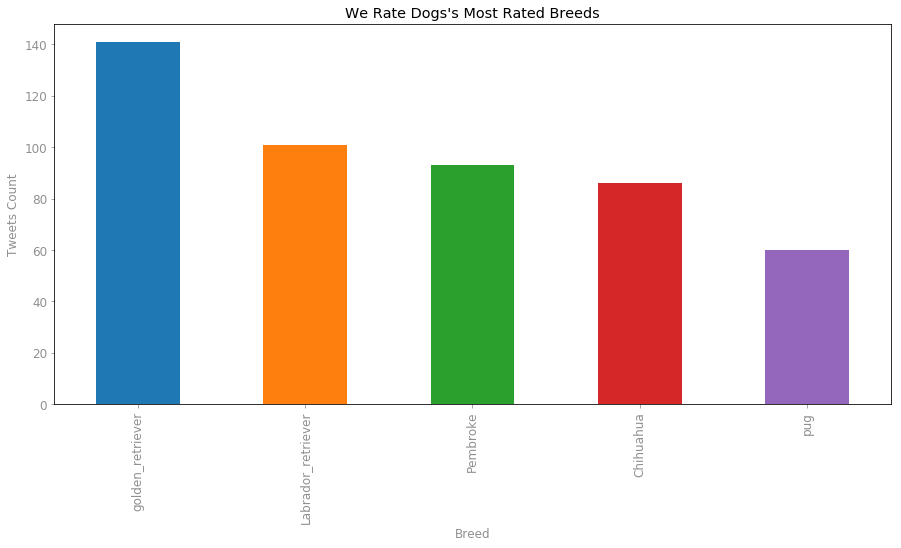

In [496]:
# select breeds with 50 or more tweets 
most_tweeted = twitter_archive_master.groupby('breed').filter(lambda x: len(x) >= 50)

# bar chart
most_tweeted['breed'].value_counts().plot(kind = 'bar')
plt.title("We Rate Dogs's Most Rated Breeds")
plt.xlabel('Breed')
plt.ylabel('Tweets Count')

fig = plt.gcf() 
fig.set_size_inches(15,7)

*Looking at their tweets count, the most rated breeds on "We Love Dogs" Twitter account are Golden Retriver, Labrador Retriever, Pembroke, Chihuahua, and Pug.*

In [497]:
# save the figure as file 
fig.savefig('most_rated_breeds.png',bbox_inches='tight');

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


### Insight 2 : Which dog stage is the most represented?

*In order to show which dog stage is the most represented, I will display the frequencies of the stages via pie chart.*

In [498]:
twitter_archive_master.stage.value_counts()

pupper     176
doggo       57
puppo       26
floofer      3
Name: stage, dtype: int64

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


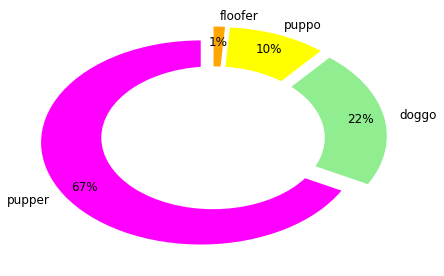

In [499]:
# create pie chart with explode property
# https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

labels = ['pupper', 'doggo', 'puppo', 'floofer']
sizes = [176, 57, 26, 3]

# colors
colors = ['magenta','lightgreen','yellow','orange']
plt.rcParams['text.color'] = 'black'

# explsion
explode = (0.09,0.09,0.09,0.09)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.0f%%', startangle=90, pctdistance=0.85, 
         explode = explode)

# draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# plot 
ax1.axis('equal')  # to make sure pie is drawn as a circle
plt.tight_layout()
plt.show()

*Looking at the numbers of each breed represented via tweets, we see that "pupper" is the most represented with its frequency being 67%. In contrast, "floofer" frequency is 1% which is signficantly low compared to the others. This shows that there may be data extraction issues.*

### Insight 3 : Which breeds are most favorited by users? 

*In order to see which breeds are most favorited by users, I will group breeds with their respective favorite counts.*

In [509]:
user_fav_breed = twitter_archive_master.query('breed ! = "none"').groupby(['breed'])['favorite_count'].sum().sort_values(ascending = False)

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


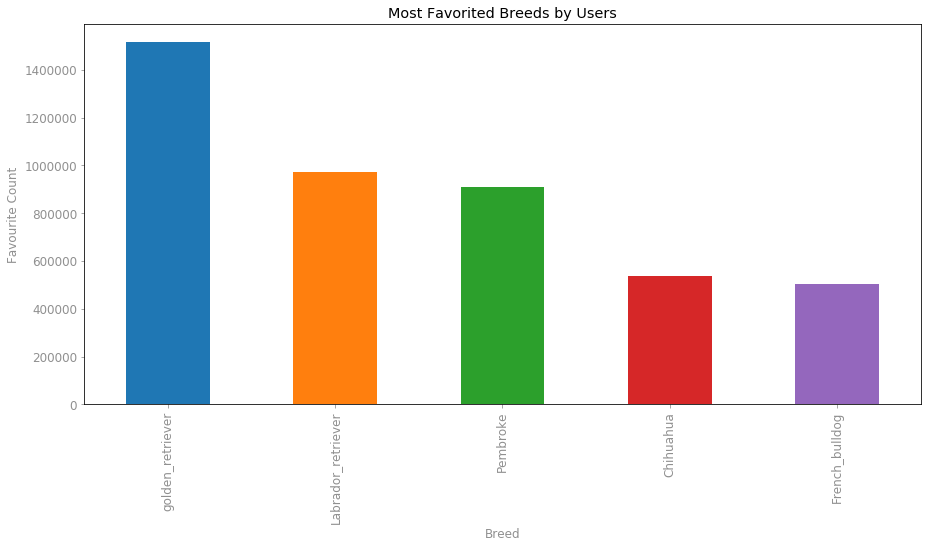

In [504]:
# select top 5 only 
top5 = user_fav_breed.head(5)

# bar chart 
top5.plot(kind = 'bar')
plt.title('Most Favorited Breeds by Users')
plt.xlabel('Breed')
plt.ylabel('Favourite Count')


fig = plt.gcf() 
fig.set_size_inches(15,7)

In [505]:
# save figure as file
fig.savefig('most_fav_breeds.png',bbox_inches='tight');

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


*As exepcted, the breed with the highest favorite counts is Golden Retriever then followed by Labrador Retriever, Pembroke, Chihuahua. I expected to see Pug at the end but French Bulldog took the 5th most favorited breed.*

                             End of Wrangle Act. Please see Wrangle Report.